# Media Company Case Study

## Multiple Linear Regression

### Problem Statement:
A digital media company (similar to Voot, Hotstar, Netflix, etc.) had launched a show. Initially, the show got a good response, but then witnessed a decline in viewership. The company wants to figure out what went wrong.


### Approach:
We are concerned about determining the driver variable for show viewership. This is the case of prediction rather than projection where we are more interested in predicting the key driver variables and their impact rather than forcasting the results.

First we will list down the potential reasons for the decline in viewershp.<br>

The potential reasons could be:
1. Decline in the number of people coming to the platform
2. Fewer people watching the video
3. A Decrease in marketing spend?
4. Competitive shows, e.g. cricket/ IPL
5. Special holidays
6. Twist in the story


### Data
We have been given data for the period of 1 March 2017 to 19 May 2017.<br>
With Columns as<br> 
Views_show         : Number of times the show was viewed<br>
Visitors           : Number of visitors who browsed the platform, but not necessarily watched a video.<br>
Views_platform	   : Number of times a video was viewed on the platform<br>
Ad_impression	   : Proxy for marketing budget. Represents number of impressions generated by ads<br>
Cricket_match_india: If a cricket match was being played. 1 indicates match on a given day, 0 indicates there wasn't<br>
Character_A        : Describes presence of Character A. 1 indicates character A was in the episode, 0 indicates she/he wasn't

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
media = pd.read_csv("mediacompany.csv")
del media['Unnamed: 7']
media.head()

,Date,Views_show,Visitors,Views_platform,Ad_impression,Cricket_match_india,Character_A
0,3/1/2017,183738,1260228,1706478,1060860448,0,0
1,3/2/2017,193763,1270561,1690727,1031846645,0,0
2,3/3/2017,210479,1248183,1726157,1010867575,0,0
3,3/4/2017,240061,1492913,1855353,1079194579,1,0
4,3/5/2017,446314,1594712,2041418,1357736987,0,0


In [3]:
media.tail()

,Date,Views_show,Visitors,Views_platform,Ad_impression,Cricket_match_india,Character_A
75,5/15/2017,313945,1808684,2226788,1398052759,1,0
76,5/16/2017,185689,1814227,2199844,1311961223,1,0
77,5/17/2017,142260,1755803,2225752,1248266254,1,0
78,5/18/2017,135871,1749654,2302789,1284859759,1,0
79,5/19/2017,108961,1746735,2279036,1246026846,1,0


In [4]:
media.shape

(80, 7)

In [5]:
media.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80 entries, 0 to 79
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Date                 80 non-null     object
 1   Views_show           80 non-null     int64 
 2   Visitors             80 non-null     int64 
 3   Views_platform       80 non-null     int64 
 4   Ad_impression        80 non-null     int64 
 5   Cricket_match_india  80 non-null     int64 
 6   Character_A          80 non-null     int64 
dtypes: int64(6), object(1)
memory usage: 4.5+ KB


In [6]:
media.describe()

,Views_show,Visitors,Views_platform,Ad_impression,Cricket_match_india,Character_A
count,80.000000,8.000000e+01,8.000000e+01,8.000000e+01,80.000000,80.000000
mean,289902.625000,1.699066e+06,2.222401e+06,1.442374e+09,0.100000,0.375000
std,154924.323585,2.311571e+05,2.913510e+05,2.983186e+08,0.301893,0.487177
min,102520.000000,1.248183e+06,1.690727e+06,1.010868e+09,0.000000,0.000000
25%,185353.250000,1.550766e+06,2.010816e+06,1.207911e+09,0.000000,0.000000
50%,235807.000000,1.698843e+06,2.226270e+06,1.385931e+09,0.000000,0.000000
75%,350079.000000,1.817895e+06,2.388837e+06,1.632416e+09,0.000000,1.000000
max,758631.000000,2.344650e+06,3.064422e+06,2.424203e+09,1.000000,1.000000


In [7]:
media.columns

Index(['Date', 'Views_show', 'Visitors', 'Views_platform', 'Ad_impression',
       'Cricket_match_india', 'Character_A'],
      dtype='object')

In [8]:
#step3 Data Cleaning

In [9]:
# 1. missing values
media.isnull().sum()

Date                   0
Views_show             0
Visitors               0
Views_platform         0
Ad_impression          0
Cricket_match_india    0
Character_A            0
dtype: int64

{'whiskers': [<matplotlib.lines.Line2D at 0x200f05774d0>,
 'caps': [<matplotlib.lines.Line2D at 0x200f05f9e50>,
 'boxes': [<matplotlib.lines.Line2D at 0x200f0575a90>],
 'medians': [<matplotlib.lines.Line2D at 0x200f05fa0d0>],
 'fliers': [<matplotlib.lines.Line2D at 0x200f05fa210>],
 'means': []}

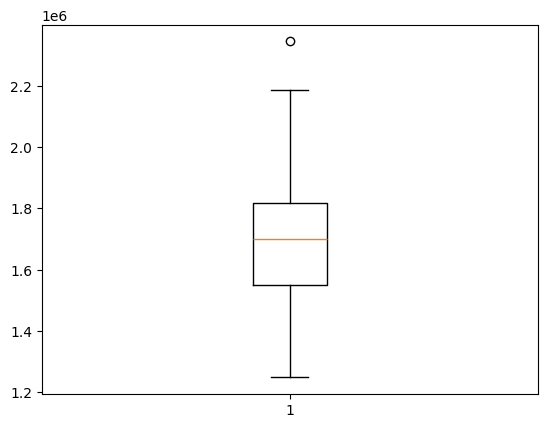

In [10]:
# 2. Outliers
plt.boxplot(media['Visitors'])


In [11]:
#data type for date is not right

In [12]:
media.dtypes

Date                   object
Views_show              int64
Visitors                int64
Views_platform          int64
Ad_impression           int64
Cricket_match_india     int64
Character_A             int64
dtype: object

In [13]:
media['Date'] = pd.to_datetime(media['Date'])
media.dtypes

Date                   datetime64[ns]
Views_show                      int64
Visitors                        int64
Views_platform                  int64
Ad_impression                   int64
Cricket_match_india             int64
Character_A                     int64
dtype: object

In [17]:
# 2 tasks : 
# 1) Create a new column to fetch day_of_week from the data
# 2) Create a new column which tells if the day was on weekday/weekend

media['day_of_week'] = media['Date'].dt.dayofweek
# 0 for monday, 6 for sunday
media.head()


,Date,Views_show,Visitors,Views_platform,Ad_impression,Cricket_match_india,Character_A,weekday,weekpart,day_of_week
0,2017-03-01,183738,1260228,1706478,1060860448,0,0,2,0,2
1,2017-03-02,193763,1270561,1690727,1031846645,0,0,3,0,3
2,2017-03-03,210479,1248183,1726157,1010867575,0,0,4,0,4
3,2017-03-04,240061,1492913,1855353,1079194579,1,0,5,1,5
4,2017-03-05,446314,1594712,2041418,1357736987,0,0,6,1,6


In [18]:
media['week_part'] = media['day_of_week'].apply(lambda x : 1 if x > 4 else 0 )
media.head()

,Date,Views_show,Visitors,Views_platform,Ad_impression,Cricket_match_india,Character_A,weekday,weekpart,day_of_week,week_part
0,2017-03-01,183738,1260228,1706478,1060860448,0,0,2,0,2,0
1,2017-03-02,193763,1270561,1690727,1031846645,0,0,3,0,3,0
2,2017-03-03,210479,1248183,1726157,1010867575,0,0,4,0,4,0
3,2017-03-04,240061,1492913,1855353,1079194579,1,0,5,1,5,1
4,2017-03-05,446314,1594712,2041418,1357736987,0,0,6,1,6,1


In [ ]:
# Exploratory Data Analysis

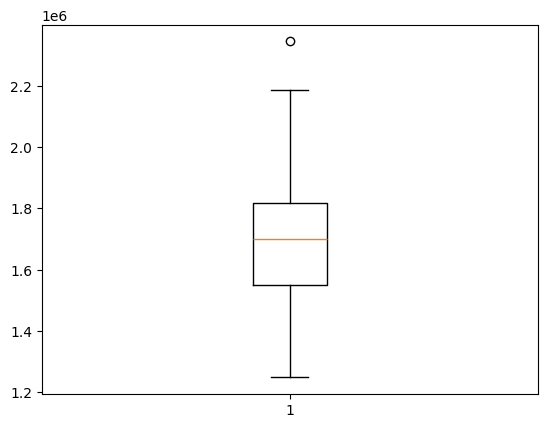

In [19]:
#1. Univarite Analysis

plt.boxplot(media['Visitors'])
plt.show()

<Axes: xlabel='Date'>

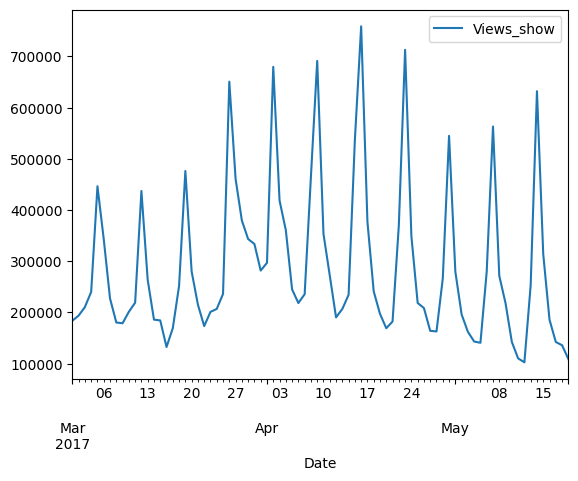

In [20]:
# 2) Bivarite Analysis
media.plot.line(x='Date',y='Views_show')
# therre's some pattern in the data!

<Axes: xlabel='day_of_week', ylabel='Views_show'>

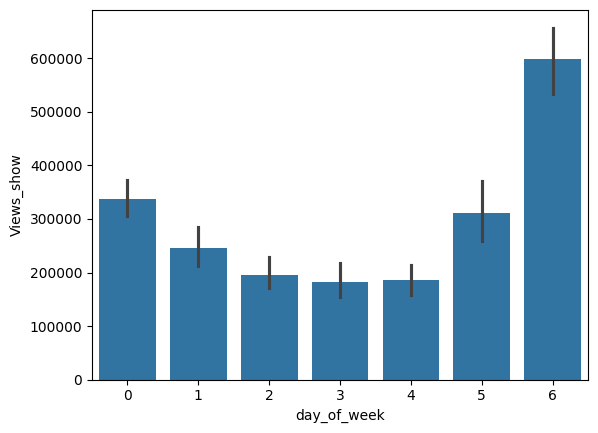

In [21]:
# Day of week
sns.barplot(data=media,x='day_of_week',y='Views_show')
# we can see that Views are more on 'Sunday' and 'Saturday'(weekends) and decline on subsequent days.

In [22]:
# Tasks :
# 1) Views_show and weekend/weekday
# 2) Scatter between Views_show & Visitors
# 3) Scatter between Views_show & Ad_impression
# 4) Scatter between Views_show & Views_platform
# 5) Views_show v/s CricketMatchIndia
# 6) Views_show v/s Char_A
# 7) Find corr on all numerical columns

<Axes: xlabel='week_part', ylabel='Views_show'>

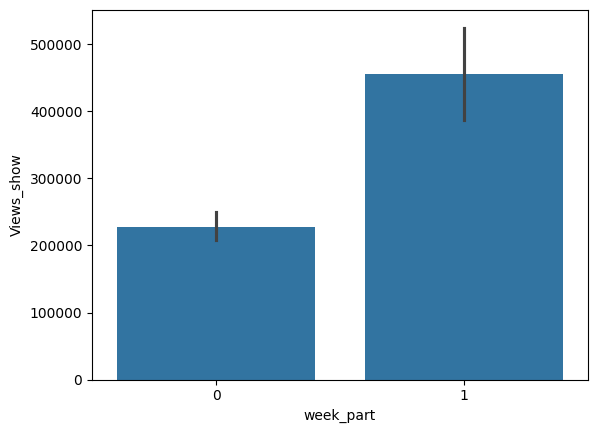

In [25]:
# 1) Views_show and weekend/weekday
sns.barplot(data=media,x='week_part',y='Views_show')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80 entries, 0 to 79
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Date                 80 non-null     datetime64[ns]
 1   Views_show           80 non-null     int64         
 2   Visitors             80 non-null     int64         
 3   Views_platform       80 non-null     int64         
 4   Ad_impression        80 non-null     int64         
 5   Cricket_match_india  80 non-null     int64         
 6   Character_A          80 non-null     int64         
 7   weekday              80 non-null     int32         
 8   weekpart             80 non-null     int64         
 9   day_of_week          80 non-null     int32         
 10  week_part            80 non-null     int64         
dtypes: datetime64[ns](1), int32(2), int64(8)
memory usage: 6.4 KB


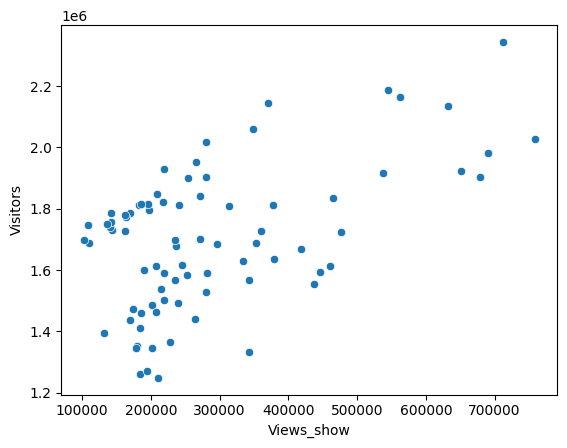

In [28]:
 # 2) Scatter between Views_show & Visitors
media.info()

sns.scatterplot(data=media, x = 'Views_show', y = 'Visitors')
plt.xlabel('Views_show')
plt.ylabel('Visitors')
plt.show()

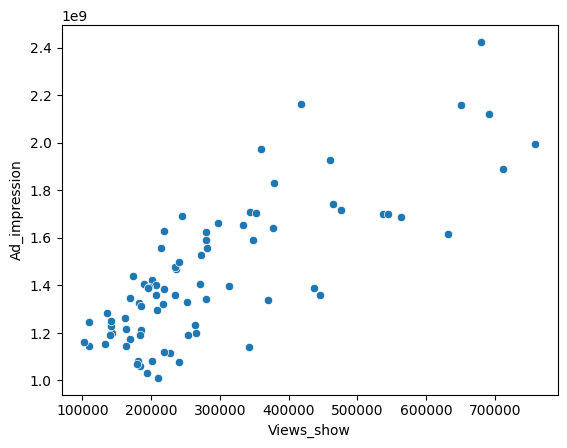

In [29]:
# 3) Scatter between Views_show & Ad_impression

sns.scatterplot(data=media, x = 'Views_show', y = 'Ad_impression')
plt.xlabel('Views_show')
plt.ylabel('Ad_impression')
plt.show()

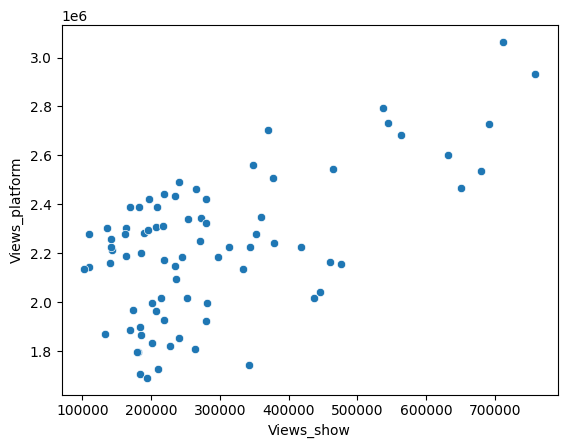

In [30]:
# 4) Scatter between Views_show & Views_platform

sns.scatterplot(data=media, x = 'Views_show', y = 'Views_platform')
plt.xlabel('Views_show')
plt.ylabel('Views_platform')
plt.show()

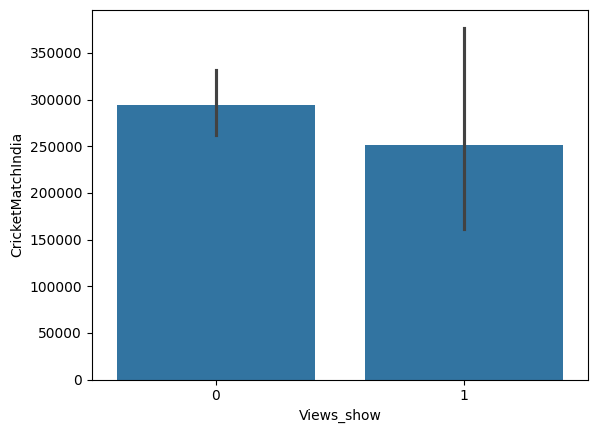

In [43]:
# 5) Views_show v/s CricketMatchIndia

sns.barplot(data = media, y ='Views_show', x ='Cricket_match_india')
plt.xlabel('Views_show')
plt.ylabel('CricketMatchIndia')
plt.show()

In [ ]:
# Show views slightly declines when there is a cricket match.

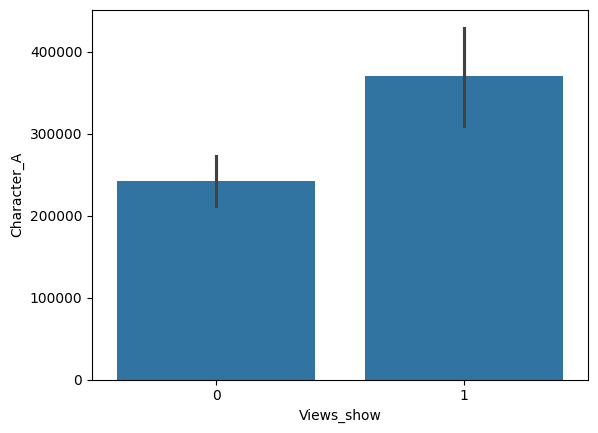

In [45]:
# 6) Views_show v/s Char_A
sns.barplot(data = media, y ='Views_show', x ='Character_A')
plt.xlabel('Views_show')
plt.ylabel('Character_A')
plt.show()

In [47]:
# Presence of Character A improves the show viewership.

<Axes: >

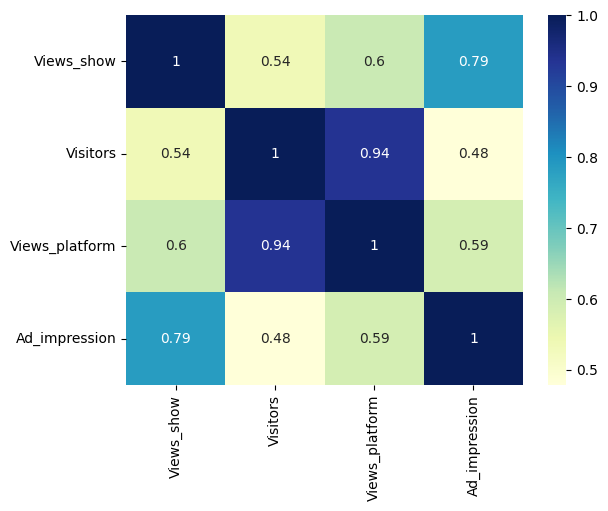

In [48]:
# 7) Find corr on all numerical columns
corr= media[['Views_show', 'Visitors', 'Views_platform', 'Ad_impression']].corr()
sns.heatmap(corr, annot=True,  cmap="YlGnBu")

In [50]:
# Modeling :

from sklearn.preprocessing import MinMaxScaler

# Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables
scaler = MinMaxScaler()
num_vars = ['Views_show','Visitors','Views_platform','Ad_impression']
media[num_vars] = scaler.fit_transform(media[num_vars])
media.head()

,Date,Views_show,Visitors,Views_platform,Ad_impression,Cricket_match_india,Character_A,weekday,weekpart,day_of_week,week_part
0,2017-03-01,0.123787,0.010985,0.011466,0.035372,0,0,2,0,2,0
1,2017-03-02,0.139066,0.020409,0.000000,0.014844,0,0,3,0,3,0
2,2017-03-03,0.164544,0.000000,0.025792,0.000000,0,0,4,0,4,0
3,2017-03-04,0.209631,0.223199,0.119842,0.048345,1,0,5,1,5,1
4,2017-03-05,0.523988,0.316041,0.255290,0.245426,0,0,6,1,6,1


In [51]:
del media['Date']

In [59]:
# 
y = media['Views_show']
X = media[[ 'Visitors', 'Views_platform', 'Ad_impression',
       'Cricket_match_india', 'Character_A', 'day_of_week', 'week_part']]

In [60]:
import statsmodels.api as sm
X = sm.add_constant(X)
lm_1 = sm.OLS(y,X).fit()
print(lm_1.summary())

                            OLS Regression Results                            
Dep. Variable:             Views_show   R-squared:                       0.825
Model:                            OLS   Adj. R-squared:                  0.808
Method:                 Least Squares   F-statistic:                     48.43
Date:                Sun, 20 Jul 2025   Prob (F-statistic):           9.60e-25
Time:                        15:17:42   Log-Likelihood:                 72.139
No. Observations:                  80   AIC:                            -128.3
Df Residuals:                      72   BIC:                            -109.2
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.0265    

In [54]:
del X['Cricket_match_india']
del X['day_of_week']

In [55]:
lm_2 = sm.OLS(y,X).fit()
print(lm_2.summary())

                            OLS Regression Results                            
Dep. Variable:             Views_show   R-squared:                       0.823
Model:                            OLS   Adj. R-squared:                  0.811
Method:                 Least Squares   F-statistic:                     68.98
Date:                Sun, 20 Jul 2025   Prob (F-statistic):           1.87e-26
Time:                        15:11:53   Log-Likelihood:                 71.802
No. Observations:                  80   AIC:                            -131.6
Df Residuals:                      74   BIC:                            -117.3
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.0064      0.027      0.

In [56]:
# task :
# 1) split the data into train and test
# 2) sklearn library and train the model
# 3) prediciton
# 4) Calc rsq and mean abs error

In [57]:
# 1) split the data into train and test

In [64]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3 , random_state=100)
X_train.head()

,const,Visitors,Views_platform,Ad_impression,Cricket_match_india,Character_A,day_of_week,week_part
57,1.0,0.478141,0.445989,0.145521,0,0,3,0
35,1.0,0.335410,0.359202,0.480818,0,1,2,0
51,1.0,0.513024,0.506901,0.221375,0,1,4,0
21,1.0,0.206039,0.201117,0.302954,0,0,2,0
32,1.0,0.596801,0.615321,1.000000,0,1,6,1


In [65]:
y_train.head()

57    0.093769
35    0.217030
51    0.121455
21    0.107848
32    0.879427
Name: Views_show, dtype: float64

In [66]:
# 2) sklearn library and train the model

from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [67]:
# 3) prediciton
y_pred = model.predict(X_test)

In [68]:
# 4) Calc R2 and mean abs error

from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

r2 = r2_score(y_test,y_pred)
mse = mean_squared_error(y_test,y_pred)

print(r2)

0.7886031818752506


In [69]:
print(mse)

0.016313036147453098
